### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
# Importing the dataset

data = pd.read_csv(r"C:\Users\APJ\Downloads\train_LZdllcl.csv")

In [62]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438.0,7.0,31.0,2.0,0.0,2.0,1.0,35.0,5.0,8.0,1.0,0.0,49.0,0.0
1,65141.0,4.0,14.0,0.0,1.0,0.0,1.0,30.0,5.0,4.0,0.0,0.0,60.0,0.0
2,7513.0,7.0,10.0,0.0,1.0,2.0,1.0,34.0,3.0,7.0,0.0,0.0,50.0,0.0
3,2542.0,7.0,15.0,0.0,1.0,0.0,1.0,39.0,1.5,10.0,0.0,0.0,50.0,0.0
4,48945.0,8.0,18.0,0.0,1.0,0.0,1.0,45.0,3.0,2.0,0.0,0.0,73.0,0.0


In [5]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [6]:
data.shape

(54808, 14)

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

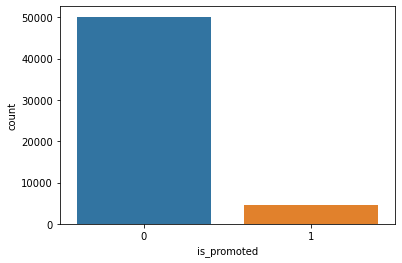

In [7]:
sns.countplot(x=data['is_promoted'],data=data)

In [8]:
data['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [ ]:
# As we can see that the dependent variable does not have equal number of outcomes

### Preprocessing

#### Handling Null values

In [10]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [21]:
# We can use the interpolate method to fill the missing values in previous year rating

data.interpolate(inplace=True)

In [23]:
# Before filling the education column we are converting it to numerical data using an encoder

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in data.columns:
    data['education'] = labelencoder.fit_transform(data['education'])

In [24]:
data['education']=data.groupby(['department'])['education'].apply(lambda x: x.fillna(x.median()))

In [25]:
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [ ]:
# We have successfully dealt with all the null values

In [ ]:
# We are converting the remaning object columns to numerical values

In [27]:
obj_column= data.select_dtypes(include='object')

In [28]:
for column in obj_column:
    data[column] = labelencoder.fit_transform(data[column])

#### Handling Outliers

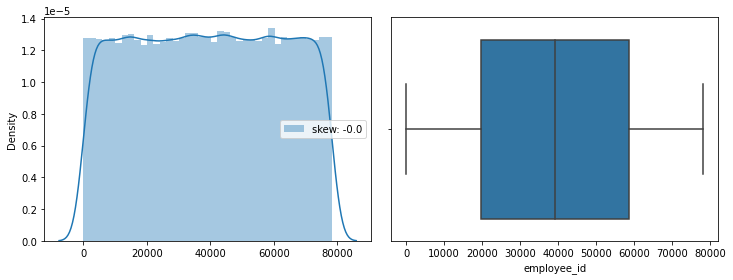

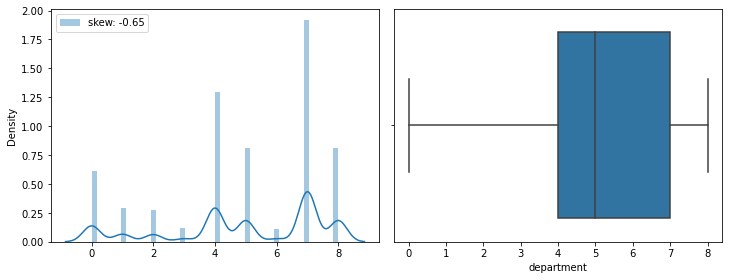

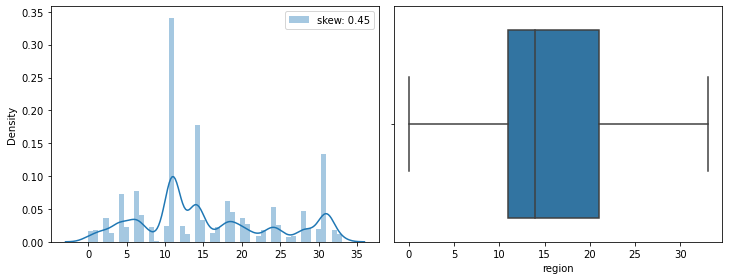

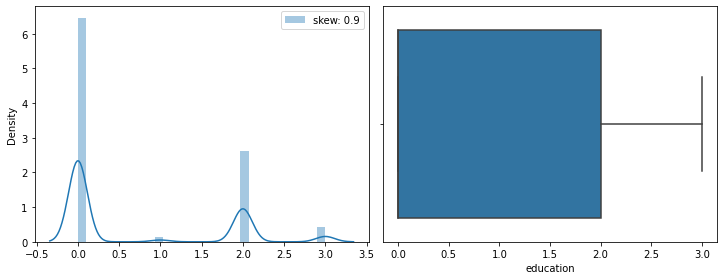

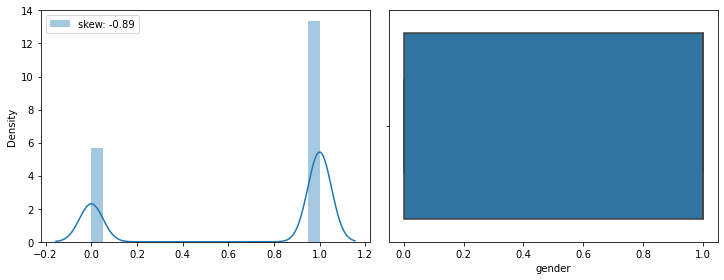

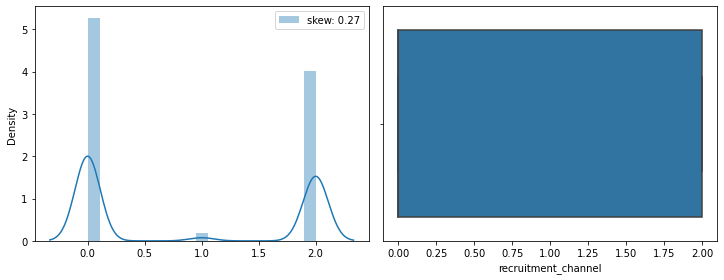

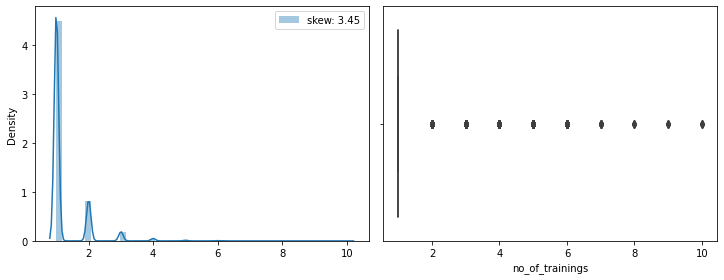

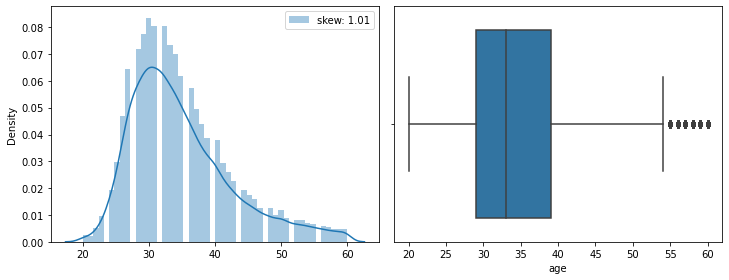

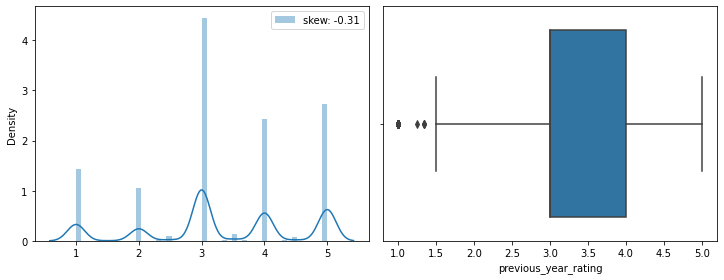

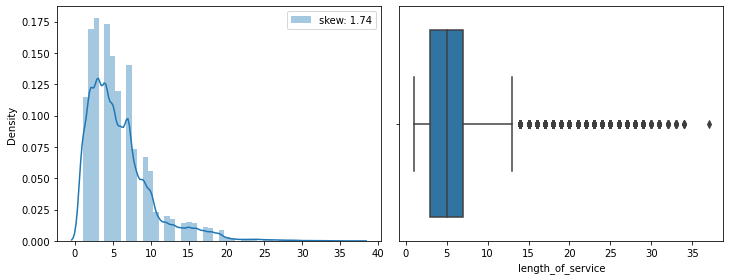

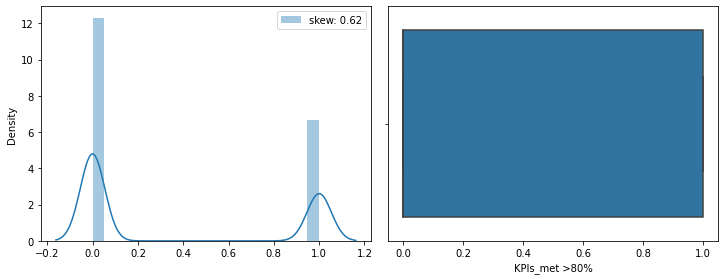

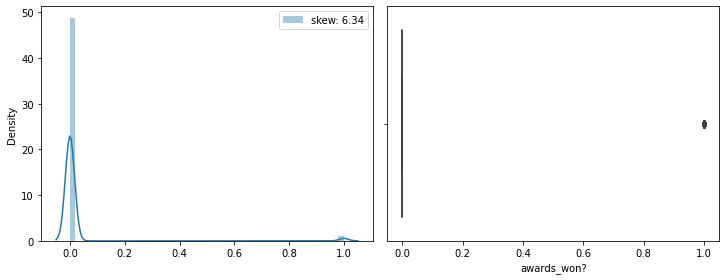

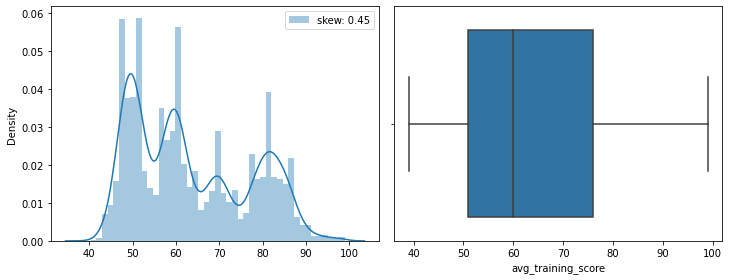

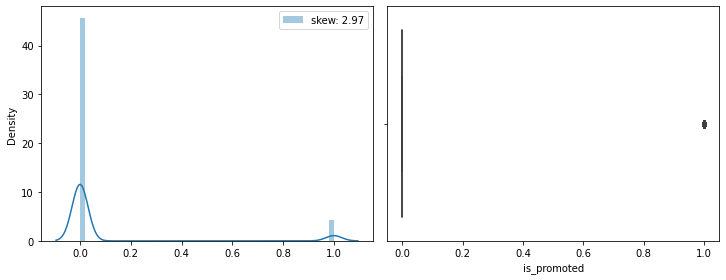

In [31]:
# Visualizing the outliers

features = data.columns.to_list()

for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(x = data[col],label='skew: '+ str(np.round(data[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(data[col])
    plt.tight_layout()
    plt.show()

In [32]:
## Capping and Flooring the Outliers

def IQR_CAP(df,cols):
    
    for col in cols:
        Q1=data[col].quantile(0.25)
        Q3=data[col].quantile(0.75)
        
        IQR=Q3-Q1
        
        LL=Q1-(1.5*IQR)
        UL=Q3+(1.5*IQR)
        
        data[col]= np.where(data[col]>UL,UL,np.where(data[col]<LL,LL,data[col]))

In [33]:
IQR_CAP(data,features)

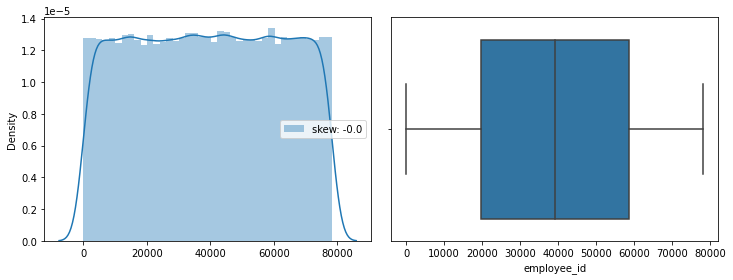

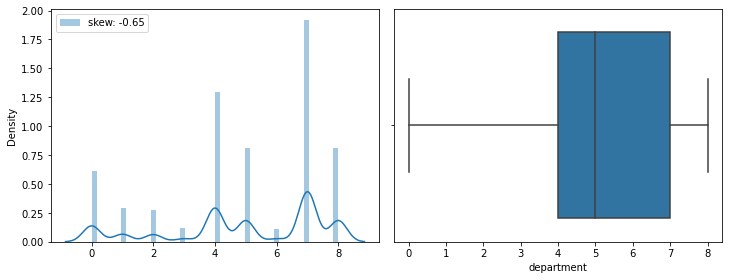

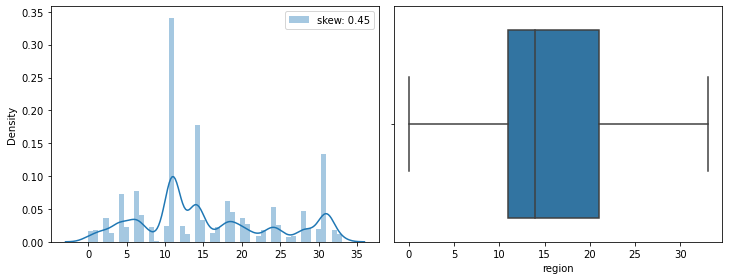

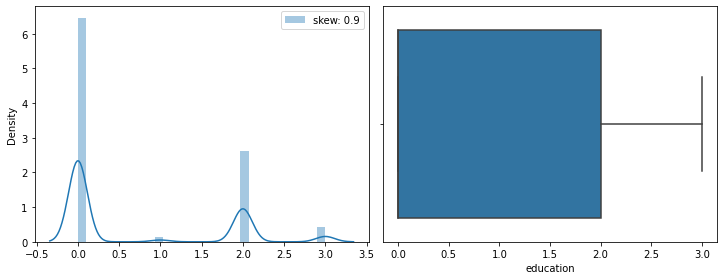

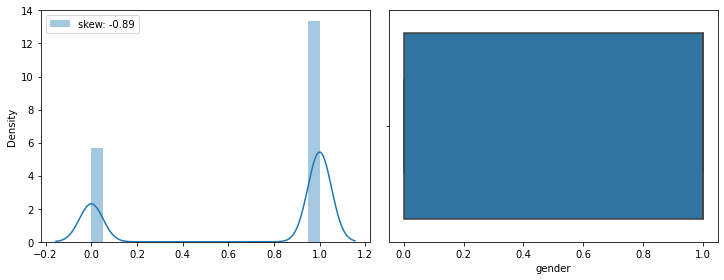

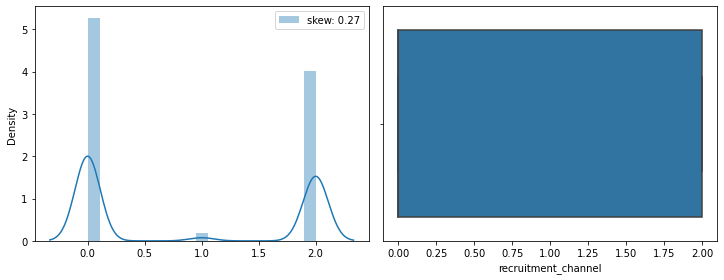

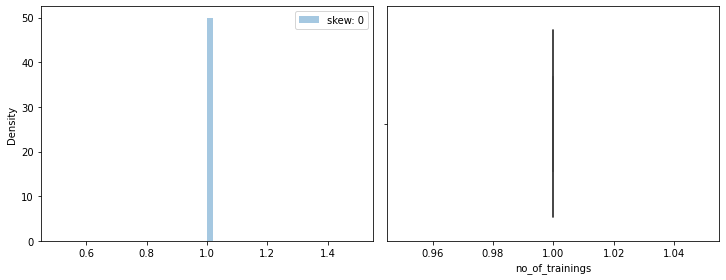

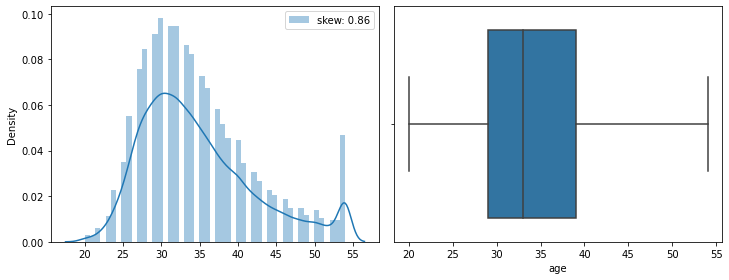

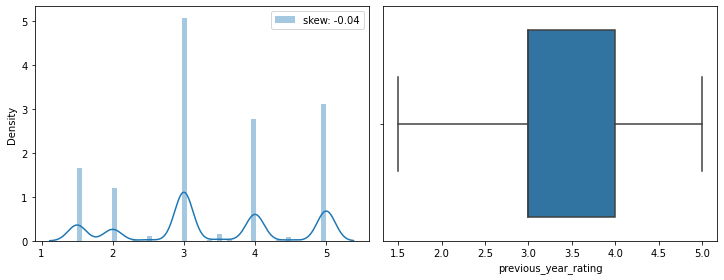

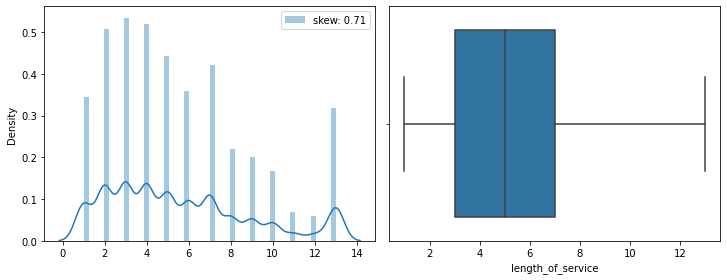

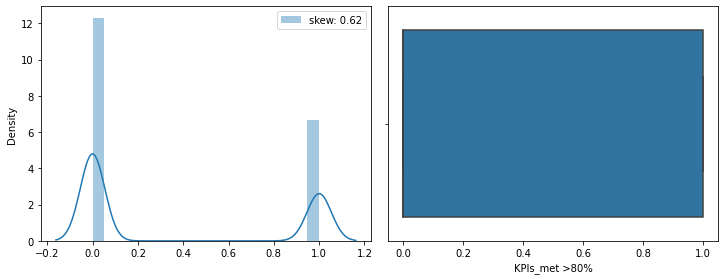

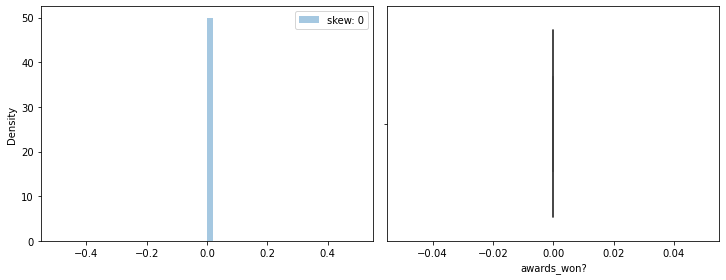

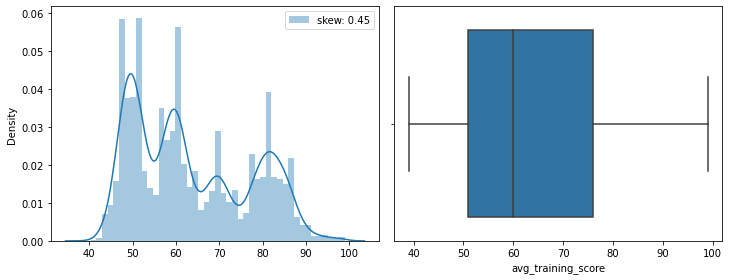

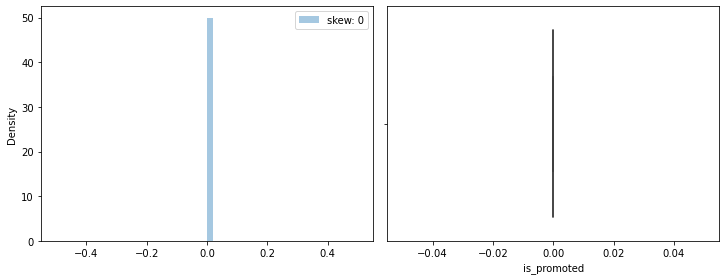

In [34]:
# Confirming the capping and flooring of outliers

for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(x = data[col],label='skew: '+ str(np.round(data[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(data[col])
    plt.tight_layout()
    plt.show()

### Feature Engineering

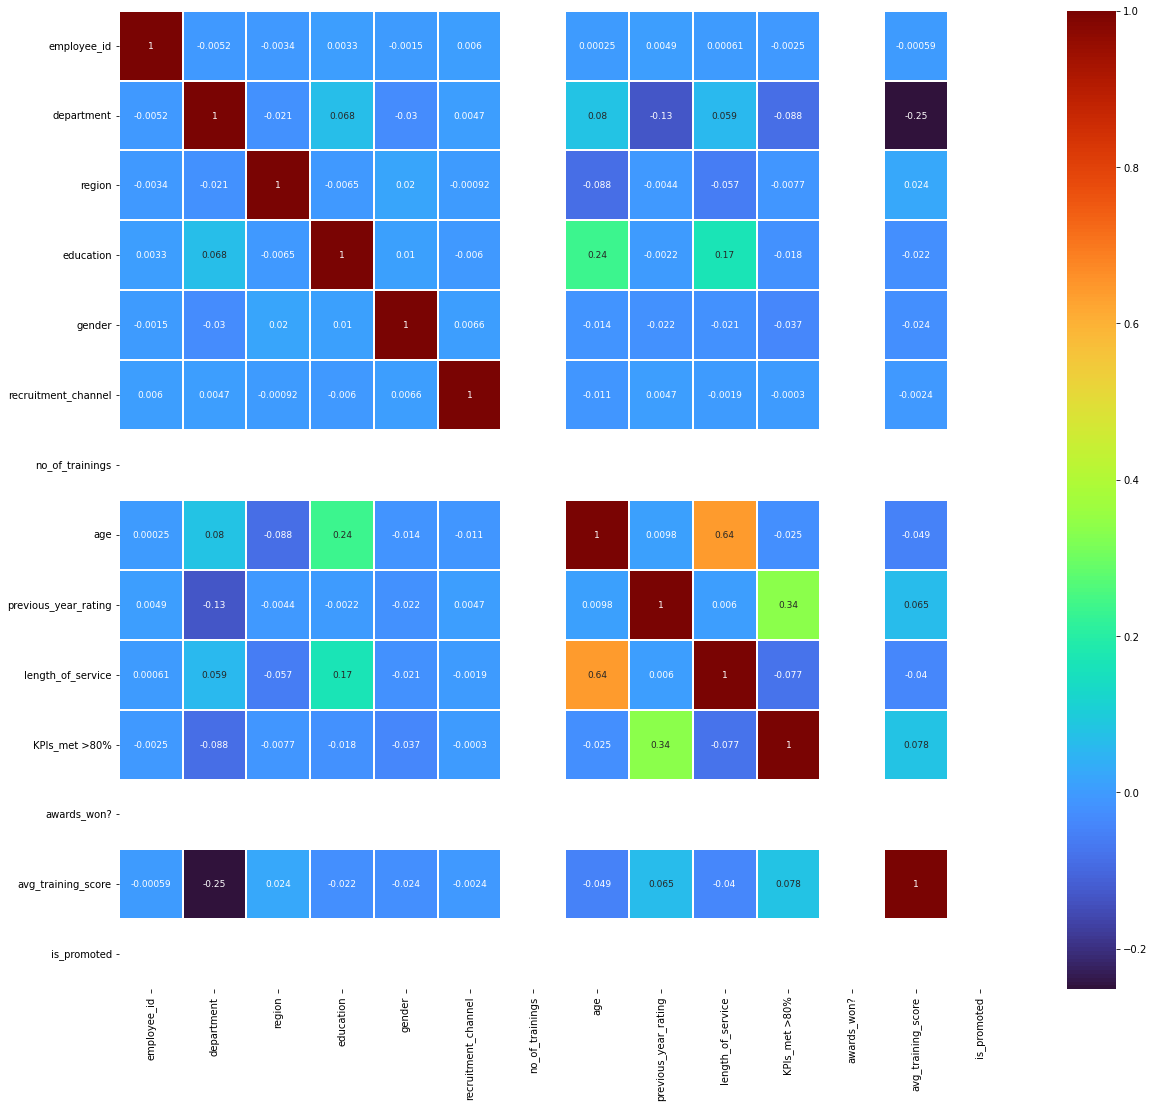

In [35]:
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(),linewidths=.1,cmap="turbo", annot=True, annot_kws={"size": 9})
plt.yticks(rotation=0);

In [36]:
data[['is_promoted','avg_training_score']].groupby('avg_training_score').mean().sort_values(by='is_promoted', ascending=False)

,is_promoted
avg_training_score,
39.0,0.0
70.0,0.0
72.0,0.0
73.0,0.0
74.0,0.0
...,...
64.0,0.0
65.0,0.0
66.0,0.0


### Modeling

In [37]:
from sklearn.model_selection import train_test_split

X=data.drop(['is_promoted'],axis=1)
y=data['is_promoted']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))

Test Accuracy: 100.0%


In [40]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

In [41]:
print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100,2)))
y_pred_dt = rf.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))

Test Accuracy: 100.0%
Decision Tree Classifier report: 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10962

    accuracy                           1.00     10962
   macro avg       1.00      1.00      1.00     10962
weighted avg       1.00      1.00      1.00     10962

[[10962]]


In [42]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

print(confusion_matrix(y_test,y_pred_dt))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10962

    accuracy                           1.00     10962
   macro avg       1.00      1.00      1.00     10962
weighted avg       1.00      1.00      1.00     10962

Test Accuracy: 100.0%
[[10962]]


In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

acc_values=[]
neighbours=np.arange(1,15)
for k in neighbours:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    model=classifier.fit(X_train,y_train)
    y_predict=model.predict(X_test)
    acc=accuracy_score(y_test,y_predict)
    acc_values.append(acc)
acc_values

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Text(0, 0.5, 'accuracy value')

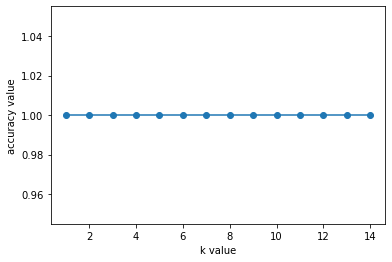

In [46]:
plt.plot(neighbours,acc_values,"o-")
plt.xlabel("k value")
plt.ylabel("accuracy value")

In [47]:
classifier=KNeighborsClassifier(n_neighbors=7,metric='minkowski')
model=classifier.fit(X_train,y_train)
y_predict=model.predict(X_test)


print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))

print("accuracy_score is",  accuracy_score(y_test,y_predict) )
print("precision_score is" ,precision_score(y_test,y_predict) )
print("recall_score is" ,recall_score(y_test,y_predict) )
print("f1_score is" ,f1_score(y_test,y_predict) )

Decision Tree Classifier report: 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10962

    accuracy                           1.00     10962
   macro avg       1.00      1.00      1.00     10962
weighted avg       1.00      1.00      1.00     10962

[[10962]]
accuracy_score is 1.0
precision_score is 0.0
recall_score is 0.0
f1_score is 0.0


In [49]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(nb.score(X_test, y_test)*100, 2)))

Test Accuracy: 100.0%


In [ ]:
# We are going forward with the random forest classifier

In [50]:
preds = rf.predict(X_test)
print(preds[:36])
print(y_test[:36].values)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [51]:
test_data=pd.read_csv(r"C:\Users\APJ\Downloads\test_2umaH9m.csv")

In [52]:
for column in obj_column:
    test_data[column] = labelencoder.fit_transform(test_data[column])
    
for column in data.columns:
    test_data['education'] = labelencoder.fit_transform(test_data['education'])
    
test_data['previous_year_rating'].fillna(test_data['previous_year_rating'].median(), inplace=True)

In [53]:
test_data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [54]:
pred_test_data=rf.predict(test_data)

In [55]:
pred_test_data

array([0., 0., 0., ..., 0., 0., 0.])

In [56]:
final = pd.DataFrame()
final['employee_id']=test_data.employee_id


#pd.concat([tit_df,sex,embarked],axis=1)

In [57]:
final['employee_id']

0         8724
1        74430
2        72255
3        38562
4        64486
         ...  
23485    53478
23486    25600
23487    45409
23488     1186
23489     5973
Name: employee_id, Length: 23490, dtype: int64

In [69]:
final['is_promoted']=pred_test_data
final = final.reset_index(drop=True)

In [72]:
final.to_csv('submission.csv',index=False)

In [63]:
final.head()

,employee_id,is_promoted
0,8724,0.0
1,74430,0.0
2,72255,0.0
3,38562,0.0
4,64486,0.0


In [65]:
final['is_promoted'].value_counts()

0.0    23490
Name: is_promoted, dtype: int64

In [70]:
final.dtypes

employee_id      int64
is_promoted    float64
dtype: object

In [71]:
final['is_promoted'] = final['is_promoted'].astype(int)